# Expectation-Maximization (EM) Algorithm

The EM algorithm, a widely used approach to learning in the presence of unobserved variables. The EM algorithm can be used even for variables whose value is never directly observed, provided the general form of the probability distribution governing these variables is known.

The EM algorithm has been used to train Bayesian belief networks (see Heckerman, 1995) as well as radial basis function networks. The EM algorithm is also the basis for many unsupervised clustering algorithms (e.g., Cheeseman et al. 1988), and it is the basis for the widely used Baum-Welch forward-backward algorithm for learning Partially Observable Markov Models (Rabiner, 1989).

To simplify our discussion, we consider the special case where the selection of the single normal distribution at each step is based on choosing each with uniform probability, where each of the k normal distributions has the same variance s^2 and where s^2 is known.

The learning task is to output a hypothesis h = (mu1, mu2) that describes the means of each of the k distributions.

In [251]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import scipy.stats

In [258]:
# mixture of two gaussian distributions
gauss = {'1': [-8, 2], '2': [10, 2]}
values = []
for x in range(0, 2000):
    choice = np.random.choice(np.arange(1,3), p=[0.6, 0.4])
    values.append(np.random.normal(gauss[str(choice)][0], gauss[str(choice)][1], 1)[0])

In [259]:
def expectation_maximization(data, n_mixtures):
    alpha = np.ones(n_mixtures) * 0.5
    mu = np.random.random(n_mixtures) * 10
    sigma = np.ones(n_mixtures) * 1.0
    q = np.zeros((n_mixtures, len(data)))
    for x in range(0, 100):
        # Expectation Step
        for m in range(n_mixtures):
            q[m] = alpha[m] * scipy.stats.norm.pdf(data, mu[m], sigma[m])
        C = np.sum(q, axis=0)
        q /= C # normalized to values in range 0-1 (probabilities)

        # Maximization Step
        alpha = np.sum(q, axis=1) / len(data)
        mu = np.sum(q * data, axis=1) / np.sum(q, axis=1)
        sigma = np.sqrt(np.sum(q * pow(data - mu[:, np.newaxis], 2), axis=1) / np.sum(q, axis=1))
        sigma[sigma < 0.1] = 0.1
    return alpha, mu, sigma

In [260]:
alpha, mu, sigma = expectation_maximization(np.asarray(values), 2)

In [261]:
alpha

array([0.40249776, 0.59750224])

In [262]:
x_min = np.min(-20)
x_max = np.min(30)
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x, mu[0], sigma[0])*alpha[0]
y2 = scipy.stats.norm.pdf(x, mu[1], sigma[1])*alpha[1]
y3 = y+y2

Text(0, 0.5, 'Normal Distribution')

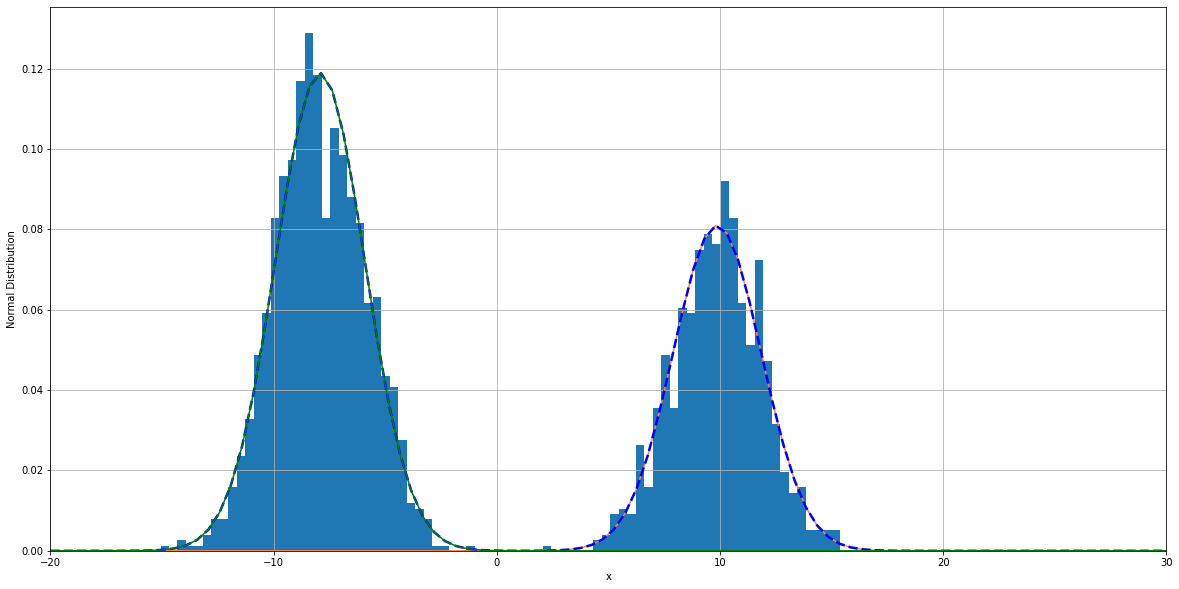

In [265]:
plt.plot(x,y, color='coral')
plt.plot(x,y3, color='blue', linestyle='--', linewidth=2.5)
plt.plot(x,y2, color='green')
plt.hist(np.asarray(values), density=True, bins=80)
plt.grid()

plt.xlim(x_min,x_max)

plt.xlabel('x')
plt.ylabel('Normal Distribution')